# NBA position classification

------------------------

In [392]:
pd.options.display.max_columns = 160
pd.options.display.max_rows = 350
%matplotlib inline


import sys
sys.path.append('/Users/sinsanghun/anaconda/lib/python2.7/site-packages')

## 변수 정리 

col = ['Player',
 'Team',
 'Season',
 'Season Type',
 'Games',
'Min',
'Assisted 3Pts %',
'Assisted Dunk %',
'Left Corner 3 %',
'Assisted 2Pts %',
'Assists to Jump Shots PG',
'Above the Break 3 %',
'3PTM',
'Ast',
'Right Corner 3 %',
'Blk',
'Above the Break 3-Usage',
'3PTA',
'OReb',
'Tip-ins',
'Assisted Layup %',
'Assisted FG %',
'Assisted Jump Shot %',
'3+ Blk Games',
'Lost Ball Fouls',
'10+ Ast Games',
'Left Corner 3-Usage',
'Assists to 3 Pointers PG',
'Assists to Dunks PG',
'10+ Reb Games',
'Dunks',
'Assists to Layups PG',
'Right Corner 3-Usage',
'3FGM',
'Jump Shots',
'Avg. Shot Dist.',
'Restricted Area-Usage',
'Dreb',
'Bad Pass TO PG',
'Avg. Made Shot Dist.',
'In The Paint (Non-RA)-Usage',
'Double Doubles',
'3FG%',
'3FGA',
'Pts',
'Stl',
'Defensive 3 Seconds',
'3+ 3PTM Games',
'Layups',
'25+ Pts Games',
'Shooting Fouls Committed',
'3+ Stl Games',
'Assisted FG Pct.',
'Personal Fouls PG',
'Mid-Range-Usage',
"Pos"]

col = ['Player',
 'Team',
 'Season',
 'Season Type',
 'Games',
 'Above the Break 3-Usage',
 'Mid-Range-Usage',
 'In The Paint (Non-RA)-Usage',
 'Restricted Area-Usage',
 'Right Corner 3-Usage',
 'Left Corner 3-Usage',
 'Above the Break 3 %',
 'Mid-Range %',
 'In The Paint (Non-RA) %',
 'Restricted Area %',
 'Right Corner 3 %',
 'Left Corner 3 %',
 'Personal Fouls PG',
 'Charges Drawn',
 'Off. Fouls Drawn',
 'Off. Fouls',
 'Defensive 3 Seconds',
 'Shooting Fouls Committed',
 'Lost Ball Fouls',
 'Defensive Goaltendings',
 'Blocks Against',
       
 'Total Points',
 'Assisted FG Pct.',
 'Blocked FG Pct.',
 'Last Min. FGM',
 'Last Min. FGA',
 'Last Min. FG%',
 'Avg. Shot Dist.',
 'Avg. Made Shot Dist.',
       
 'FT Rate',
 'Triple Doubles',
 'Double Doubles',
 '25+ Pts Games',
 '10+ Reb Games',
 '10+ Ast Games',
 '3+ Blk Games',
 '3+ Stl Games',
 '3+ 3PTM Games',
 'Bad Pass TO PG',
 'Lost Ball TO PG',
 'Traveling PG',
 'Out of Bounds TO PG',
 'Jump Shots',
 'Layups',
 'Dunks',
 'Tip-ins',    
 'Min',
 'Pts',
 'OReb',
 'Dreb',
 'Ast',
 'Stl',
 'Blk',
 'FGM_y',
 'FGA_y',
 '3PTM',
 '3PTA',
 'FTM_y',
 'FTA_y',

 'Four Point Plays',
 'Completed Four Point Plays',
 'And One',
 'Completed Three Point Plays',
 'Extra Free Throw Percentage',
 'Free Throw Rate Difference',
       
 'Assisted FG %',
 'Assisted 2Pts %',
 'Assisted 3Pts %',
 'Assisted Dunk %',
 'Assisted Layup %',
 'Assisted Jump Shot %',
 'Assists to Dunks PG',
 'Assists to Layups PG',
 'Assists to Jump Shots PG',
 'Assists to 3 Pointers PG',
 'Avg. Assisted Shot Distance',
 'Avg. Assisted Jump Shot Distance',
       
 'Pos']

In [393]:
data = pd.read_csv("player.csv")
data = data.iloc[:,1:]

data = data[data["Games"]>=41]
data = data[data["Min"]>=12]
data.shape

(5424, 152)

data = data[col]

In [394]:
dfy = data[["Pos"]]
dfX = data.iloc[:, 4:data.shape[1]-1]

In [395]:
from sklearn.preprocessing import StandardScaler
dfX= pd.DataFrame(StandardScaler().fit_transform(dfX), columns=dfX.columns)

## LDA로 기존 포지션 분류 예측 

In [396]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(dfX, dfy)

In [397]:
from sklearn.metrics import confusion_matrix

y_true = dfy
y_pred = lda.predict(dfX)
confusion_matrix(y_true, y_pred)

array([[ 371,  195,    0,    9,    0],
       [ 206,  843,    0,  173,   22],
       [   0,    0,  578,    0,  149],
       [  12,  174,    3,  532,  207],
       [   0,    5,  216,  212, 1517]])

In [398]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print(accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.63      0.65      0.64       575
         PF       0.69      0.68      0.69      1244
         PG       0.73      0.80      0.76       727
         SF       0.57      0.57      0.57       928
         SG       0.80      0.78      0.79      1950

avg / total       0.71      0.71      0.71      5424

0.708148967552


## XGboost로 기존 포지션 분류 예측

In [399]:
import xgboost
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=4, gamma=0.1).fit(dfX, dfy)

In [400]:
from sklearn.metrics import confusion_matrix
y_true = dfy
y_pred = model_xgb.predict(dfX)
confusion_matrix(y_true, y_pred)

array([[ 507,   64,    0,    3,    1],
       [  27, 1160,    0,   40,   17],
       [   0,    0,  671,    0,   56],
       [   5,  124,    3,  669,  127],
       [   0,    4,   79,   39, 1828]])

In [401]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print(accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.94      0.88      0.91       575
         PF       0.86      0.93      0.89      1244
         PG       0.89      0.92      0.91       727
         SF       0.89      0.72      0.80       928
         SG       0.90      0.94      0.92      1950

avg / total       0.89      0.89      0.89      5424

0.891408554572


# NBA 포지션 재정의 

## LDA로 차원축소 

In [402]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
ldaDf = lda.fit_transform(dfX, dfy)

In [403]:
lda.explained_variance_ratio_

array([ 0.81444243,  0.13601612])

In [404]:
ldaDf = pd.DataFrame(ldaDf)

In [405]:
dfy = dfy.reset_index()
del dfy["index"]
ldaDf["pos"] = dfy

## 기존 5개 포지션 시각화

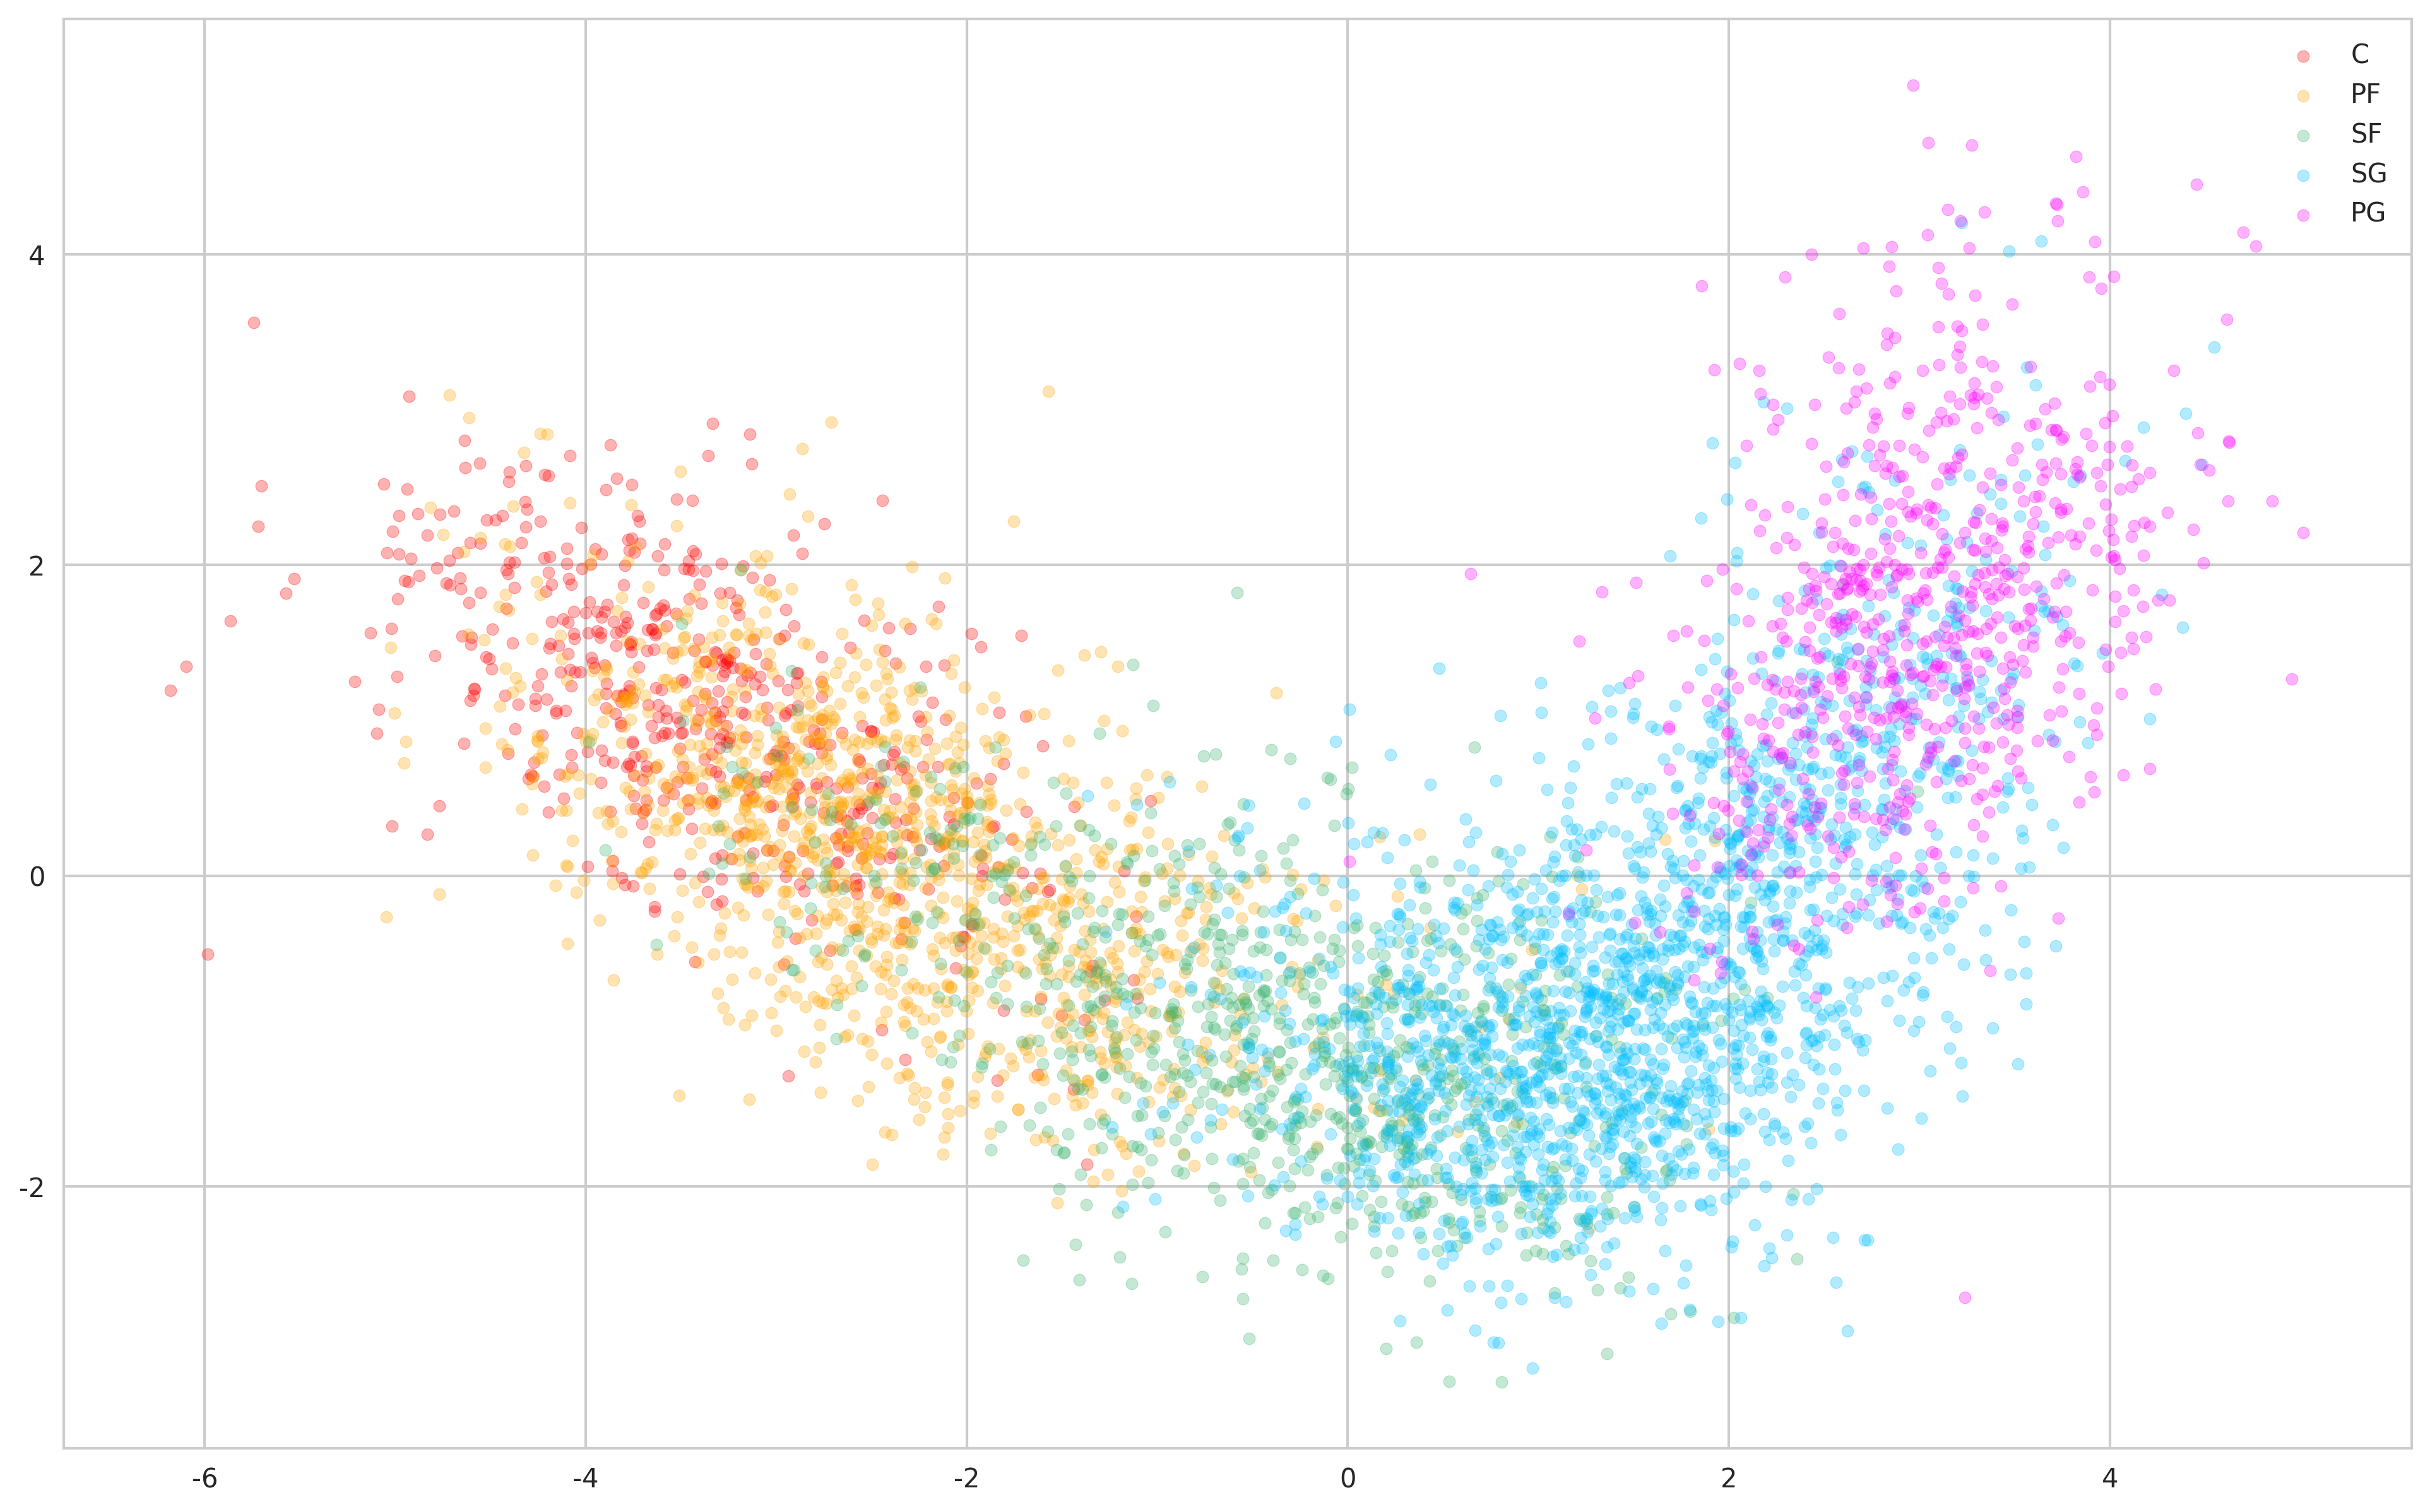

In [406]:
plt.figure(figsize=(16,10),dpi=300)
plt.scatter(ldaDf[ldaDf["pos"]=="C"].iloc[:,0], ldaDf[ldaDf["pos"]=="C"].iloc[:,1], color="red", marker="o", s=20, alpha=0.3, label="C")
plt.scatter(ldaDf[ldaDf["pos"]=="PF"].iloc[:,0], ldaDf[ldaDf["pos"]=="PF"].iloc[:,1], color="orange", marker="o", s=20, alpha=0.3, label="PF")
plt.scatter(ldaDf[ldaDf["pos"]=="SF"].iloc[:,0], ldaDf[ldaDf["pos"]=="SF"].iloc[:,1], color="mediumseagreen", marker="o", s=20, alpha=0.3, label="SF")
plt.scatter(ldaDf[ldaDf["pos"]=="SG"].iloc[:,0], ldaDf[ldaDf["pos"]=="SG"].iloc[:,1], color="deepskyblue", marker="o", s=20, alpha=0.3, label="SG")
plt.scatter(ldaDf[ldaDf["pos"]=="PG"].iloc[:,0], ldaDf[ldaDf["pos"]=="PG"].iloc[:,1], color="magenta", marker="o", s=20, alpha=0.3, label="PG")
plt.legend()
plt.show()

### 실루엣 coefficient ( 기존 포지션에 대한 )

In [407]:
y = []
for i in range(dfy.shape[0]):
    y.append(dfy["Pos"][i])
y = np.array(y)

In [408]:
del ldaDf["pos"]

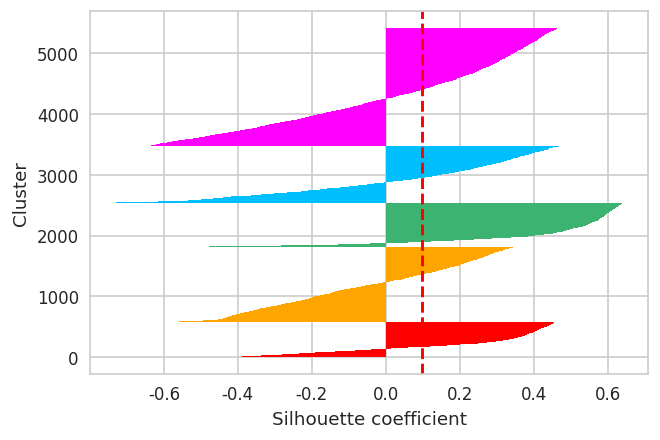

In [409]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

color = ["red", "orange", "mediumseagreen", "deepskyblue", "magenta"]

silhouette_vals = silhouette_samples(ldaDf, y, metric="euclidean")
cluster_labels = np.unique(dfy)
n_clusters = cluster_labels.shape[0]

y_ax_lower, y_ax_upper = 0, 0

yticks = []


plt.figure(dpi=120)

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    #color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             edgecolor="none",
             color=color[i],
             height = 1.0
            )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
#plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show()
            

## 10개로 포지션을 재정의한 후 시각화

In [410]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, init="k-means++").fit(ldaDf)

In [411]:
model = model.predict(ldaDf)

In [ ]:
ldaDf["cluster"] = model

In [ ]:
plt.figure(figsize=(16,10),dpi=300)
plt.scatter(ldaDf[ldaDf["cluster"]==0].iloc[:,0], ldaDf[ldaDf["cluster"]==0].iloc[:,1], color="red", marker="o", s=20, alpha=0.3, label="0")
plt.scatter(ldaDf[ldaDf["cluster"]==1].iloc[:,0], ldaDf[ldaDf["cluster"]==1].iloc[:,1], color="orange", marker="o", s=20, alpha=0.3, label="1")
plt.scatter(ldaDf[ldaDf["cluster"]==2].iloc[:,0], ldaDf[ldaDf["cluster"]==2].iloc[:,1], color="gold", marker="o", s=20, alpha=0.3, label="2")
plt.scatter(ldaDf[ldaDf["cluster"]==3].iloc[:,0], ldaDf[ldaDf["cluster"]==3].iloc[:,1], color="green", marker="o",s=20, alpha=0.3, label="3")
plt.scatter(ldaDf[ldaDf["cluster"]==4].iloc[:,0], ldaDf[ldaDf["cluster"]==4].iloc[:,1], color="deepskyblue", marker="o", s=20, alpha=0.3, label="4")
plt.scatter(ldaDf[ldaDf["cluster"]==5].iloc[:,0], ldaDf[ldaDf["cluster"]==5].iloc[:,1], color="cyan", marker="o",s=20, alpha=0.3, label="5")
plt.scatter(ldaDf[ldaDf["cluster"]==6].iloc[:,0], ldaDf[ldaDf["cluster"]==6].iloc[:,1], color="lightseagreen", marker="o",s=20, alpha=0.3, label="6")
plt.scatter(ldaDf[ldaDf["cluster"]==7].iloc[:,0], ldaDf[ldaDf["cluster"]==7].iloc[:,1], color="magenta", marker="o",s=20, alpha=0.3, label="7")
plt.scatter(ldaDf[ldaDf["cluster"]==8].iloc[:,0], ldaDf[ldaDf["cluster"]==8].iloc[:,1], color="pink", marker="o",s=20, alpha=0.3, label="8")
plt.scatter(ldaDf[ldaDf["cluster"]==9].iloc[:,0], ldaDf[ldaDf["cluster"]==9].iloc[:,1], color="k", marker="o",s=20, alpha=0.3, label="9")
plt.scatter(ldaDf[ldaDf["cluster"]==10].iloc[:,0], ldaDf[ldaDf["cluster"]==10].iloc[:,1], color="lime", marker="o",s=20, alpha=0.3, label="10")
plt.scatter(ldaDf[ldaDf["cluster"]==11].iloc[:,0], ldaDf[ldaDf["cluster"]==11].iloc[:,1], color="navy", marker="o",s=20, alpha=0.3, label="11")
plt.scatter(ldaDf[ldaDf["cluster"]==12].iloc[:,0], ldaDf[ldaDf["cluster"]==12].iloc[:,1], color="violet", marker="o",s=20, alpha=0.3, label="12")
plt.legend()
plt.show()

### 실루엣 coefficient ( 10개 포지션에 대한 )

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

color = ["red", "orange", "gold", "green", "blue", "cyan", "lightseagreen", "m", "pink", "k", "lime", "navy", "violet"]

silhouette_vals = silhouette_samples(ldaDf, model, metric="euclidean")
cluster_labels = np.unique(model)
n_clusters = cluster_labels.shape[0]

y_ax_lower, y_ax_upper = 0, 0

yticks = []


plt.figure(dpi=120)

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[model == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    #color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             edgecolor="none",
             color=color[i],
             height = 1.0
            )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show()
            

### 클러스터 특징 파악 

In [ ]:
ldaDf["cluster"].value_counts()

In [ ]:
dfX["cluster"] = ldaDf["cluster"]

In [ ]:
col =  dfX.columns

color = ["red", "orange", "gold", "green", "blue", "cyan", "lightseagreen", "m", "pink", "k", "lime", "navy", "violet"]

plt.figure(figsize=(16,8), dpi=300)

plt.subplot(311)
half = int((len(col) - 4) / 2)
c = col[ : half]
ind = range(len(c))

for i in range(n_clusters):
    a = dfX[dfX["cluster"]==i]
    a = pd.DataFrame(a)
    b = a.iloc[:,:len(a)-1].mean()
    plt.plot(b.values[:half], label = str(i) + " clus", color=color[i])

plt.xticks(ind, c, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


plt.subplot(313)
c = col[half : len(col)-1]
ind = range(len(c))

for i in range(n_clusters):
    a = dfX[dfX["cluster"]==i]
    a = pd.DataFrame(a)
    b = a.iloc[:,:len(a)-1].mean()
    plt.plot(b.values[half:len(b)-1], label = str(i) + " clus", color=color[i])

plt.xticks(ind, c, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

In [ ]:
dfX.columns